# Projet Machine Learning - Bank Account Fraud

## 1. Préparation des données

### 1.1 Préparation du workspace

####   • Import des librairies

In [1]:
# Données
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

#Graphiques
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt

#Machine Learning
import sklearn.preprocessing as preproc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, KFold
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#### • Import des données

In [2]:
# Import des données
data_set = pd.read_csv("BankAcountFraud.csv",sep=",",decimal=".",index_col=0)
data_set = data_set.sample(n=10000)

Les données initiales contenaient un million d'échantillons, mais en raison de la grande quantité de données et d'un temps d'exécution trop élevé, nous avons finalement sélectionné aléatoirement dix mille échantillons comme notre base de données.

### 1.2 Observations des données et des variables

Notre étude commence par l'observation des données. Tout d'abord, nous montrons les premières lignes du tableau afin d'identifier les premières tendances et particularités.

In [3]:
# Premières lignes
data_set.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
fraud_bool,,,,,,,,,,,,,,,,,,,,,
0,0.7,0.162501,34,14,40,1.069145,-1.370685,AB,1702,2324.486012,...,0,200.0,0,INTERNET,24.319110,linux,0,1,0,4
0,0.5,0.298024,-1,65,20,0.006873,-1.480217,AB,3590,5786.844943,...,0,200.0,0,INTERNET,4.000683,windows,0,1,0,0
0,0.2,0.184622,-1,117,20,2.696349,41.401013,AA,3602,9442.665787,...,0,200.0,0,INTERNET,6.185185,other,1,1,0,0
0,0.8,0.485701,54,4,60,0.015434,-1.344981,AB,529,5549.044071,...,0,200.0,0,INTERNET,17.168351,linux,1,1,0,7
0,0.9,0.702544,11,30,40,0.020116,-0.503426,AC,597,3911.219071,...,1,500.0,0,INTERNET,7.577927,linux,1,1,0,4


In [4]:
# Dimensions
data_set.shape

(10000, 31)

In [5]:
#Transformer la colonne fraud_bool （index） en une colonne.
data_set = data_set.reset_index()
data_set.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.7,0.162501,34,14,40,1.069145,-1.370685,AB,1702,...,0,200.0,0,INTERNET,24.319110,linux,0,1,0,4
1,0,0.5,0.298024,-1,65,20,0.006873,-1.480217,AB,3590,...,0,200.0,0,INTERNET,4.000683,windows,0,1,0,0
2,0,0.2,0.184622,-1,117,20,2.696349,41.401013,AA,3602,...,0,200.0,0,INTERNET,6.185185,other,1,1,0,0
3,0,0.8,0.485701,54,4,60,0.015434,-1.344981,AB,529,...,0,200.0,0,INTERNET,17.168351,linux,1,1,0,7
4,0,0.9,0.702544,11,30,40,0.020116,-0.503426,AC,597,...,1,500.0,0,INTERNET,7.577927,linux,1,1,0,4


Nous disposons de 1000000 données qui représentent des comptes bancaires, et nous disposons de 31 covariables plus de la variable target qui est la colonne fraud_bool, à savoir si c'est fraud ou pas.

In [6]:
# Liste des colonnes
data_set.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [7]:
# Liste des colonnes selon leur type
data_set.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

On observe que la base de données comprend plusieurs variables, dont certaines sont de type numérique (int64， float64) et d'autres variables sont de type object.

Certaines variables sont catégoriques. Par exemple la variable "payment_type" a cinque catégories distinctes (AA, AB, AC, AD, et AE) et 'source' (INTERNET et TELEAPP).

Un résumé des variables est ensuite affiché. Des statistiques descriptives résument les principales caractéristiques de chaque variable, fournissant des indices sur la distribution des données.

In [8]:
# Synthèse des variables
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,10000.0,0.009400,0.096502,0.000000,0.000000,0.000000,0.000000,1.000000
income,10000.0,0.556290,0.290794,0.100000,0.300000,0.600000,0.800000,0.900000
name_email_similarity,10000.0,0.494998,0.290091,0.000158,0.222956,0.494755,0.758025,0.999995
prev_address_months_count,10000.0,16.776100,43.695779,-1.000000,-1.000000,-1.000000,13.000000,364.000000
current_address_months_count,10000.0,86.443900,89.031651,-1.000000,19.000000,52.000000,129.250000,399.000000
customer_age,10000.0,33.786000,12.048266,10.000000,20.000000,30.000000,40.000000,90.000000
days_since_request,10000.0,1.067944,5.461075,0.000004,0.007200,0.015192,0.026281,75.074650
intended_balcon_amount,10000.0,8.556450,19.876292,-14.383932,-1.173777,-0.820793,5.554856,108.361126
zip_count_4w,10000.0,1572.312200,1005.839112,7.000000,904.000000,1263.000000,1930.000000,6521.000000
velocity_6h,10000.0,5662.519379,2992.321267,49.329777,3419.655657,5347.479629,7675.743116,16281.069155


In [9]:
# Déterminer si les valeurs de chaque colonne ne sont pas identiques
unique_counts = data_set.nunique()
single_unique_columns = unique_counts[unique_counts == 1].index.tolist()
single_unique_columns

['device_fraud_count']

In [10]:
# supprimer la colonne 'device_fraud_count'
data_set=data_set.drop(columns = ['device_fraud_count'])
data_set.shape

(10000, 31)

### 1.3 Analyse de la distribution de la variable cible

In [11]:
# Observation de la distribution de la variable cible
fig = px.histogram(data_set, x = "fraud_bool", nbins=2)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis=dict(tickmode='array',tickvals=[0, 1],ticktext=['0', '1']))
fig.show()

On remarque que les données de la variable cible ne sont pas équilibrées.Le nombre de fraudes représente environ 1,1 % du nombre total.
Cela peut nous poser problème Oversampling lors de la mise en place de nos modèles. Nous nous attaquerons à ce problème après.

## 2. Traitement des données & Pré-processing 

### 2.1 Data Cleaning

#### • Valeurs doublons
La base de données est générée par le GAN avec un filtre de duplicate, ce qui signifie qu'il n'y a pas de doublon dans l'ensemble de données.

In [12]:
duplicates = data_set[data_set.duplicated(keep=False)] 
print("Duplicate  are:\n", duplicates)

Duplicate  are:
 Empty DataFrame
Columns: [fraud_bool, income, name_email_similarity, prev_address_months_count, current_address_months_count, customer_age, days_since_request, intended_balcon_amount, payment_type, zip_count_4w, velocity_6h, velocity_24h, velocity_4w, bank_branch_count_8w, date_of_birth_distinct_emails_4w, employment_status, credit_risk_score, email_is_free, housing_status, phone_home_valid, phone_mobile_valid, bank_months_count, has_other_cards, proposed_credit_limit, foreign_request, source, session_length_in_minutes, device_os, keep_alive_session, device_distinct_emails_8w, month]
Index: []

[0 rows x 31 columns]


#### • Retraitement des valeurs manquantes
On affiche la nombre de valeurs manquantes par variable, ce qui permet de quantifier la qualité des données. Selon le fournisseur de la base de données, pour les colonnes "prev_address_months_count","current_address_months_count","session_length_in_minutes","bank_months_count", et "device_distinct_emails", une valeur de -1 signifie que les données sont manquantes. Pour "intended_balcon_amount", une valeur négative est une donnée manquante.

In [13]:
missing_values_1 = [
    ('prev_address_months_count', -1),
    ('current_address_months_count', -1),
    ('bank_months_count', -1),
    ('device_distinct_emails_8w', -1)
]
# Remplacement des valeurs manquantes spécifiées (par NaN)
for col, missing_value in missing_values_1:
    data_set[col]=data_set[col].replace(missing_value, np.nan)

data_set['session_length_in_minutes'] = pd.to_numeric(data_set['session_length_in_minutes'])
data_set['session_length_in_minutes'] = data_set['session_length_in_minutes'].apply(lambda x:np.nan if x==-1 else x)

data_set['intended_balcon_amount'] = pd.to_numeric(data_set['intended_balcon_amount'])
data_set['intended_balcon_amount'] = data_set['intended_balcon_amount'].apply(lambda x:np.nan if x<0 else x)


In [14]:
# Nombre de NA par variable
nan_count = pd.DataFrame(data_set.isna().sum(), columns=["Nombre_NA"])

# Ajout du % par rapport à la taille de la base de données
nan_count["Pourcentage"]= nan_count.divide(data_set.shape[0])*100

print(nan_count)

                                  Nombre_NA  Pourcentage
fraud_bool                                0         0.00
income                                    0         0.00
name_email_similarity                     0         0.00
prev_address_months_count              7110        71.10
current_address_months_count             42         0.42
customer_age                              0         0.00
days_since_request                        0         0.00
intended_balcon_amount                 7398        73.98
payment_type                              0         0.00
zip_count_4w                              0         0.00
velocity_6h                               0         0.00
velocity_24h                              0         0.00
velocity_4w                               0         0.00
bank_branch_count_8w                      0         0.00
date_of_birth_distinct_emails_4w          0         0.00
employment_status                         0         0.00
credit_risk_score              

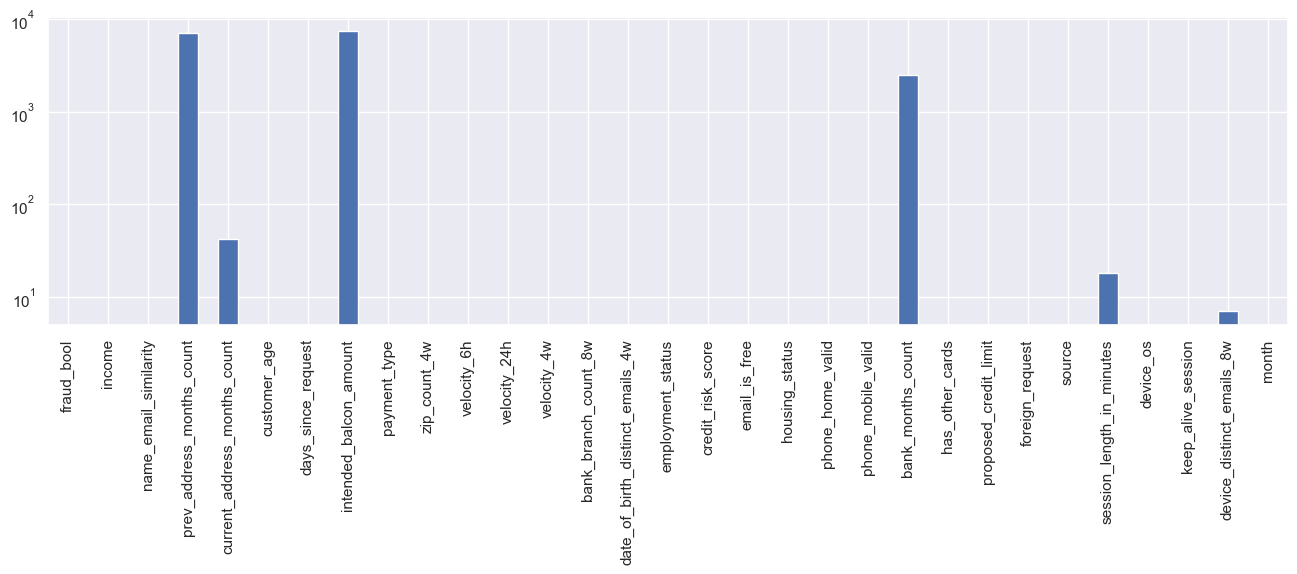

In [15]:
plt.figure(figsize=(16,4))
ax = (len(data_set.index) - data_set.count()).plot.bar()
ax.set_yscale('log') 

- On supprime les caractéristiques pour lesquelles les valeurs manquantes exitstent.

In [16]:
data_set = data_set.drop(data_set.columns[data_set.isnull().any()], axis=1)
print(data_set.shape)

(10000, 25)


### 2.2 Analyse des Variables

In [17]:
data_trans = data_set.drop("fraud_bool", axis=1)

In [18]:
# Séparation en variables qualitatives ou catégorielles
variables_numeriques = []
variables_categorielles = []
variables_numeriques_name = []
variables_categorielles_name = []
for col in data_trans.columns:
        if str(data_trans[col].dtypes) in ["int64","float64"]:
            if len(data_trans[col].unique())==2 :
                variables_categorielles.append(data_trans[col])
                variables_categorielles_name.append(col)
            else :
                variables_numeriques.append(data_trans[col])
                variables_numeriques_name.append(col)
        else :
            if len(data_trans[col].unique())==2 :
                variables_categorielles.append(data_trans[col])
                variables_categorielles_name.append(col)
            else :
                variables_categorielles.append(data_trans[col])
                variables_categorielles_name.append(col)

#### Relation entre les variables explicatives et la variable cible

- Variables numériques

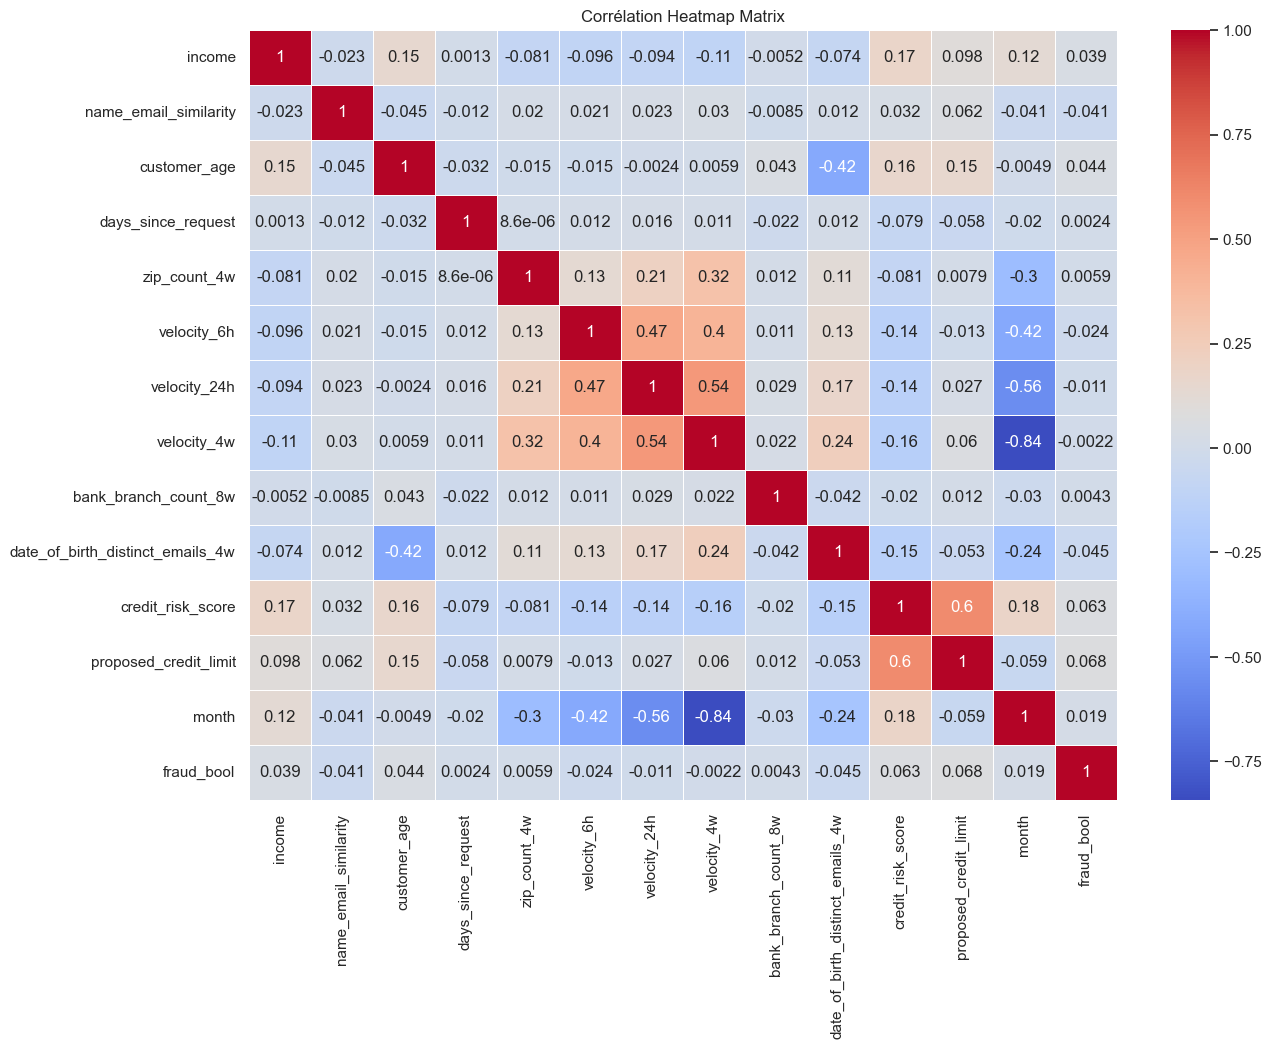

In [19]:
variables_numeriques_name.append('fraud_bool') #ajouter Y
df_variables_numeriques = data_set[variables_numeriques_name]
correlation_matrix = df_variables_numeriques.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Corrélation Heatmap Matrix')
plt.show()

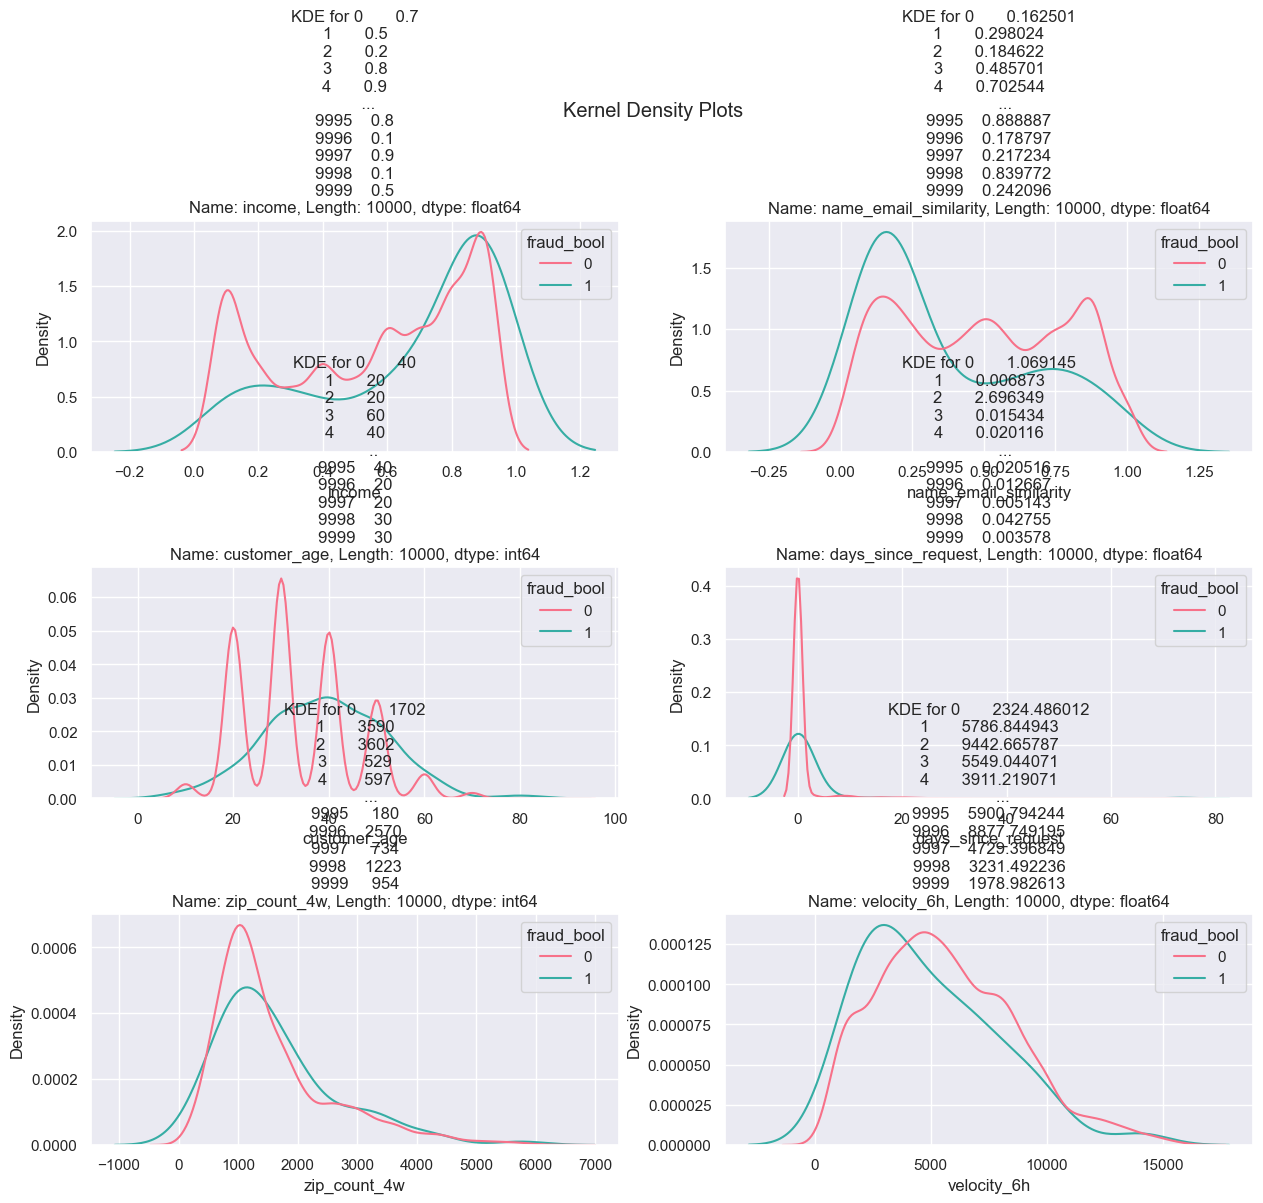

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Kernel Density Plots')

for var, ax in zip(variables_numeriques[:7], axes.flatten()):
    sns.kdeplot(data=data_set, x=var, hue='fraud_bool', palette='husl', common_norm=False, ax=ax)
    ax.set_title(f'KDE for {var}')
    handles, labels = ax.get_legend_handles_labels()
    
plt.subplots_adjust(hspace=0.5)
plt.show()

In [21]:
len(variables_numeriques)

13

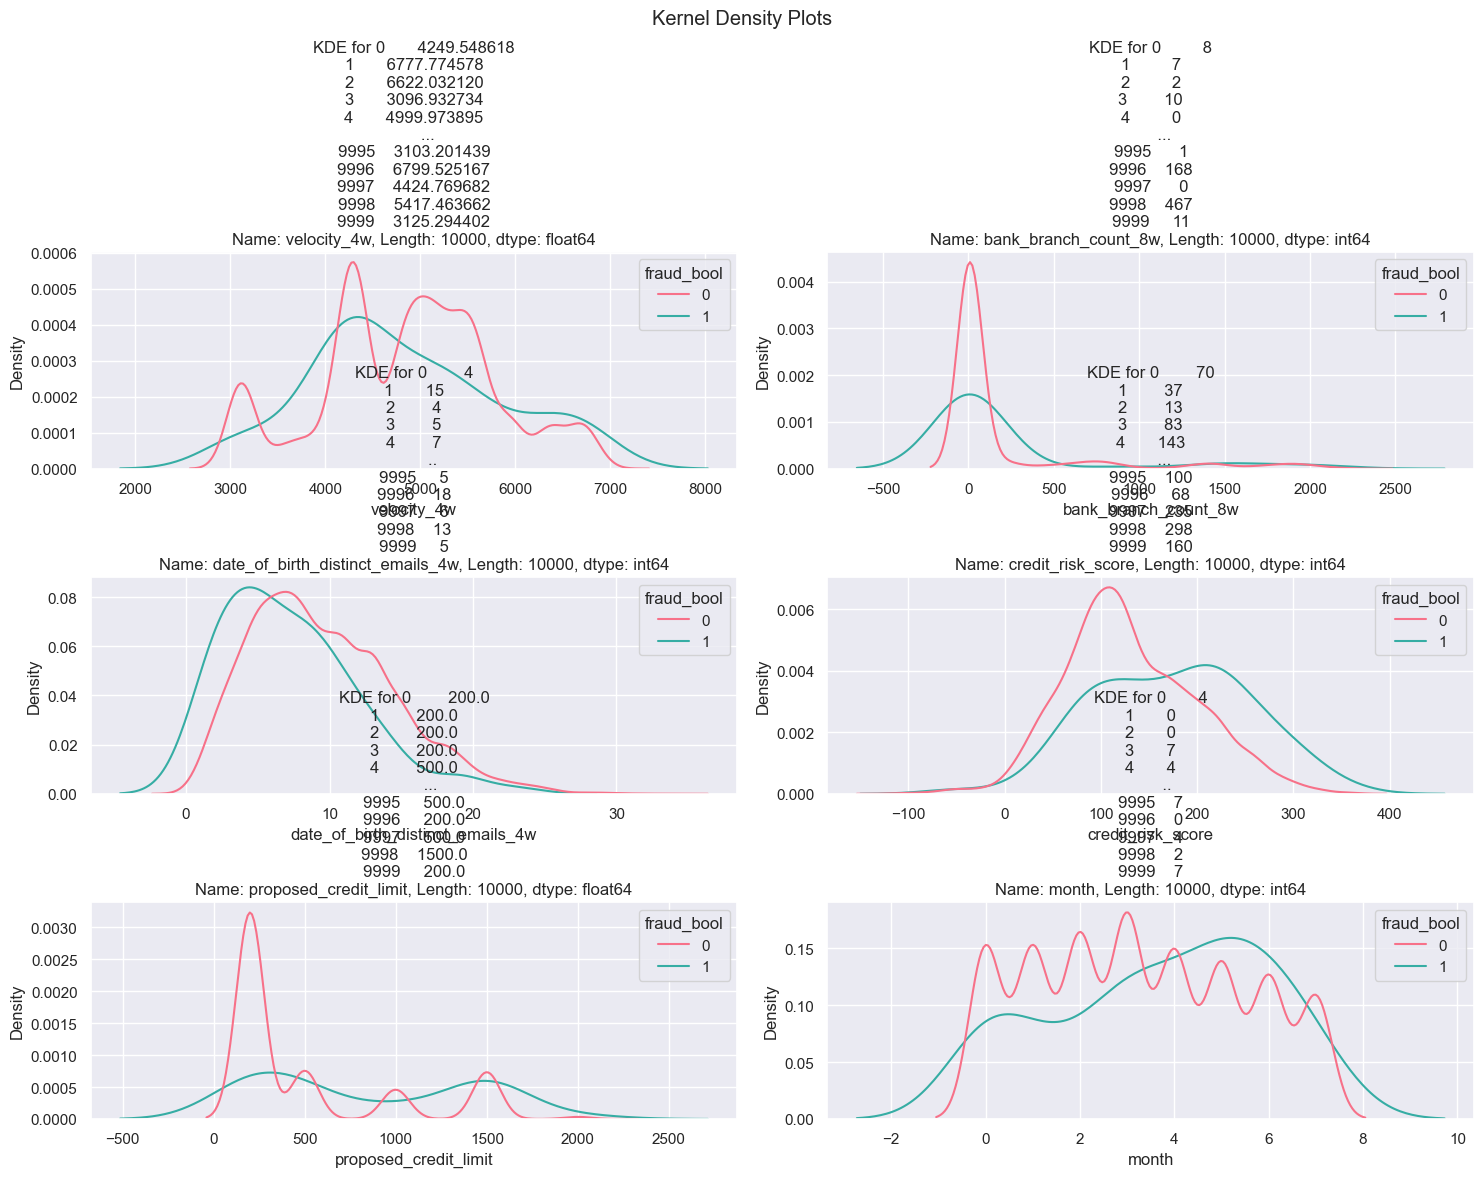

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Kernel Density Plots')

for var, ax in zip(variables_numeriques[7:], axes.flatten()):
    sns.kdeplot(data=data_set, x=var, hue='fraud_bool', palette='husl', common_norm=False, ax=ax)
    ax.set_title(f'KDE for {var}')
    handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
plt.show()

Le graphique Heatmap Matrix montre que "days_since_request" et "zip_count_4w" sont moins corrélés avec la variable dépendante "Y".
Dans les graphiques de densité des variables, il apparaît que certaines variables montrent des distinctions claires entre les deux catégories, ce qui suggère qu'elles possèdent un potentiel prédictif élevé pour la classification. Les variables telles que credit_risk_score, proposed_credit_limit, days_since_request, et income montrent des différences significatives entre les distributions des deux catégories. En revanche, les variables comme velocity_6h, zip_count_4w, bank_branch_count, date_of_birth_distinct_emails_4w, présentent des distributions très similaires, indiquant ainsi une faible puissance discriminatoire.

- Variables Categorielles


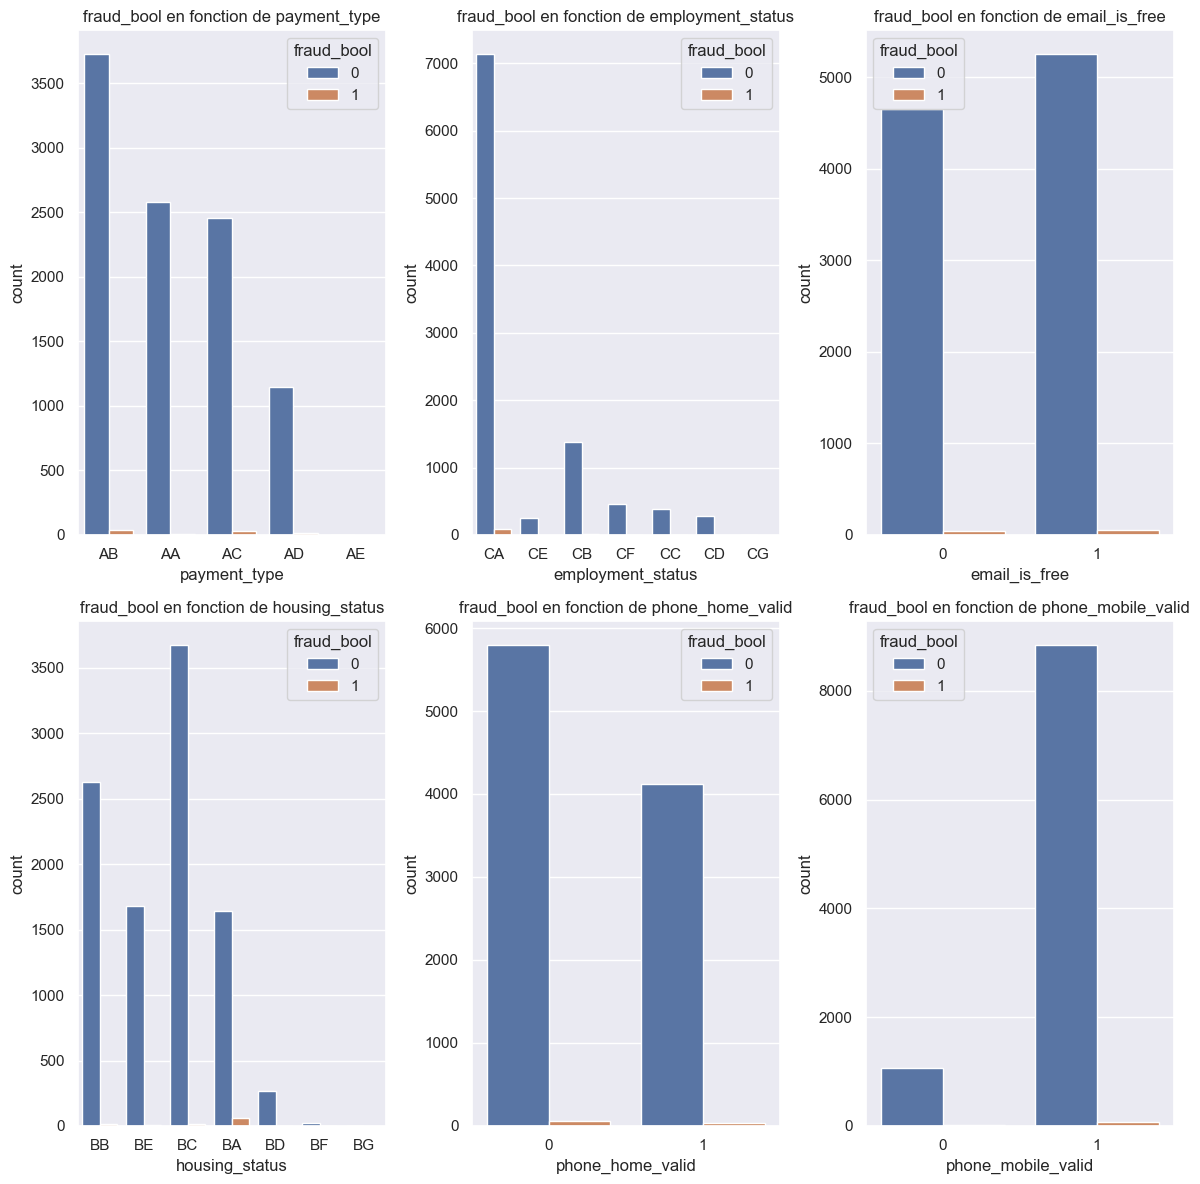

In [23]:
# Représentation de la variable dépendante avec les variables explicatves catégorielles
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

for var, ax in zip(variables_categorielles_name[:7], axes.flatten()):
    sns.countplot(data=data_set, x=var, hue='fraud_bool', ax=ax)
    ax.set_title(f'fraud_bool en fonction de {var}')
    
plt.tight_layout()
plt.show()


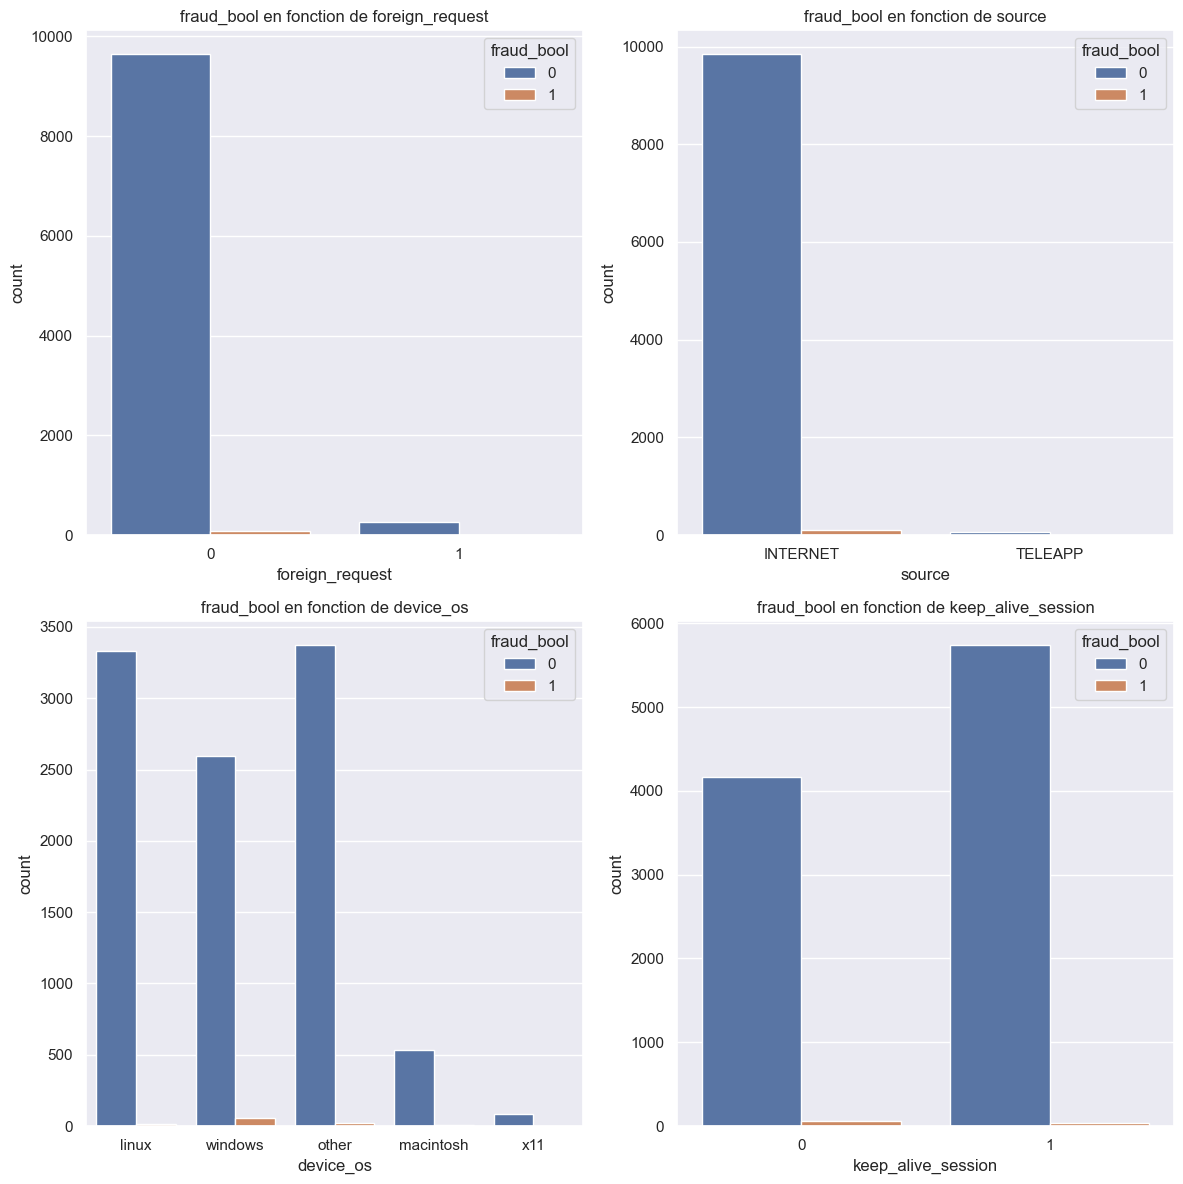

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for var, ax in zip(variables_categorielles_name[7:], axes.flatten()):
    sns.countplot(data=data_set, x=var, hue='fraud_bool', ax=ax)
    ax.set_title(f'fraud_bool en fonction de {var}')
    
plt.tight_layout()
plt.show()

 Comme on peut le voir, en raison du déséquilibre de la base de données, pour toutes les variables catégorielles, le nombre de "fraud_bool = 1" (indiquant qu'il y a eu fraude) est très faible. Donc pour mieux comprendre la corélation entre les varaibles, on crée une fonction pour faire le test Cramer's V.




 Test Cramer's V des variables catégorielles

In [25]:
# On extrait les variables catégorielles
vars_categorielles = pd.DataFrame(variables_categorielles).transpose()
vars_categorielles['fraud_bool']= data_set['fraud_bool']  #ajouter la variable Y


In [26]:
# fonction pour calculer le coefficient de corrélation de Cramer's V entre deux variables catégorielles. 
def cramers_v(var1, var2):
    # Construction du tableau de contingence
    contingency_table = pd.crosstab(var1, var2) 
    # Calcul des statistiques
    chi2, p, dof, expected = chi2_contingency(contingency_table, correction=False)
    # Nombre total d'observations
    observations = np.sum(contingency_table.values)
    # Calcul du coefficient de Cramer V
    cramer_v = np.sqrt(chi2 / (observations * min(dof, (contingency_table.shape[0]-1), (contingency_table.shape[1]-1))))
    return cramer_v

In [27]:
rows= []

for var1 in vars_categorielles:
  col = []
  for var2 in vars_categorielles :
    cramers = cramers_v(vars_categorielles[var1], vars_categorielles[var2]) # V de Cramer
    col.append(round(cramers, 2)) # arrondi du résultat
  rows.append(col)

cramers_results = np.array(rows)
v_cramer_resultats = pd.DataFrame(cramers_results, columns = vars_categorielles.columns,
                                  index = vars_categorielles.columns)

v_cramer_resultats

,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,fraud_bool
payment_type,1.00,0.06,0.04,0.10,0.08,0.06,0.13,0.03,0.05,0.07,0.03,0.04
employment_status,0.06,1.00,0.03,0.11,0.12,0.13,0.05,0.02,0.05,0.06,0.07,0.04
email_is_free,0.04,0.03,1.00,0.10,0.01,0.03,0.03,0.03,0.00,0.15,0.02,0.01
housing_status,0.10,0.11,0.10,1.00,0.10,0.10,0.11,0.04,0.03,0.08,0.08,0.12
phone_home_valid,0.08,0.12,0.01,0.10,1.00,0.27,0.09,0.00,0.02,0.06,0.03,0.02
phone_mobile_valid,0.06,0.13,0.03,0.10,0.27,1.00,0.01,0.00,0.03,0.07,0.01,0.03
has_other_cards,0.13,0.05,0.03,0.11,0.09,0.01,1.00,0.00,0.00,0.04,0.12,0.03
foreign_request,0.03,0.02,0.03,0.04,0.00,0.00,0.00,1.00,0.01,0.07,0.03,0.01
source,0.05,0.05,0.00,0.03,0.02,0.03,0.00,0.01,1.00,0.09,0.08,0.01
device_os,0.07,0.06,0.15,0.08,0.06,0.07,0.04,0.07,0.09,1.00,0.07,0.07


In [28]:
#On repère les variables trop corrélées
for i in range(v_cramer_resultats.shape[0]):
  for j in range(i+1,v_cramer_resultats.shape[0]) :
    if v_cramer_resultats.iloc[i,j] > 0.6 :
        print(v_cramer_resultats.index.to_numpy()[i]+" et "+ v_cramer_resultats.columns[j]
        + " sont trop dépendantes, V-CRAMER = " + str(v_cramer_resultats.iloc[i,j]))

On observe qu'aucune des variables catégorielles de notre dataset n'est excessivement corrélée. Cependant, on a identifié des corrélations relativement élevées entre certaines paires de variables : phone_home_valid et phone_mobile_valid, has_other_cards et payment_type, phone_home_valid et employment_status, ainsi que device_os et email_is_free. Cela peut être expliqué par des comportements ou des caractéristiques communes.

In [29]:
cramers_v_Y = {}

for col in vars_categorielles.columns:
    cramers_v_value = cramers_v(data_set['fraud_bool'], vars_categorielles[col])
    cramers_v_Y[col] = cramers_v_value

cramers_v_df = pd.DataFrame(list(cramers_v_Y.items()), columns=['Variable', 'Cramers_V'])
cramers_v_df

,Variable,Cramers_V
0,payment_type,0.035740
1,employment_status,0.037004
2,email_is_free,0.012696
3,housing_status,0.118172
4,phone_home_valid,0.016789
5,phone_mobile_valid,0.025910
6,has_other_cards,0.032215
7,foreign_request,0.009271
8,source,0.008000
9,device_os,0.071944


Parmi les variables catégorielles, housing_status, device_os et keep_alive_session montrent une corrélation plus forte avec la variable dépendante (fraud_bool). De plus, ces variables ne montrent pas de corrélations significatives entre elles, ce qui les rend appropriées pour être sélectionnées dans l'entraînement de notre modèle.

Corrélation des variables numériques

In [30]:
# On extrait les variables numériques
vars_numeriques = pd.DataFrame(variables_numeriques).transpose()
# Corrélation de Pearson
correlations_num = vars_numeriques.corr(method='pearson')
correlations_num

,income,name_email_similarity,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,proposed_credit_limit,month
income,1.000000,-0.023100,0.147489,0.001267,-0.080599,-0.096235,-0.094278,-0.108236,-0.005241,-0.073864,0.172388,0.098380,0.123223
name_email_similarity,-0.023100,1.000000,-0.044691,-0.012472,0.020111,0.020536,0.022727,0.030424,-0.008499,0.011726,0.032463,0.061602,-0.040701
customer_age,0.147489,-0.044691,1.000000,-0.031514,-0.014729,-0.015114,-0.002356,0.005851,0.042586,-0.417524,0.163481,0.153455,-0.004878
days_since_request,0.001267,-0.012472,-0.031514,1.000000,0.000009,0.011966,0.016085,0.011183,-0.022464,0.012260,-0.079381,-0.058042,-0.020355
zip_count_4w,-0.080599,0.020111,-0.014729,0.000009,1.000000,0.133221,0.213706,0.320940,0.011535,0.113383,-0.080969,0.007915,-0.296614
velocity_6h,-0.096235,0.020536,-0.015114,0.011966,0.133221,1.000000,0.473595,0.403280,0.010678,0.131449,-0.138186,-0.013453,-0.415397
velocity_24h,-0.094278,0.022727,-0.002356,0.016085,0.213706,0.473595,1.000000,0.540682,0.028782,0.166866,-0.138978,0.026850,-0.557069
velocity_4w,-0.108236,0.030424,0.005851,0.011183,0.320940,0.403280,0.540682,1.000000,0.022180,0.236368,-0.157361,0.060286,-0.843039
bank_branch_count_8w,-0.005241,-0.008499,0.042586,-0.022464,0.011535,0.010678,0.028782,0.022180,1.000000,-0.041523,-0.019522,0.011798,-0.029815
date_of_birth_distinct_emails_4w,-0.073864,0.011726,-0.417524,0.012260,0.113383,0.131449,0.166866,0.236368,-0.041523,1.000000,-0.147097,-0.052985,-0.242922


In [31]:
# On repère les variables trop corrélées
nb_variables = correlations_num.shape[0]
for i in range(nb_variables):
  for j in range(i+1,nb_variables) :
    if abs(correlations_num.iloc[i,j]) > 0.6 :
        print(correlations_num.index.to_numpy()[i]+" et "+
              correlations_num.columns[j] + " sont trop dépendantes, corr = " + str(correlations_num.iloc[i,j]))

velocity_4w et month sont trop dépendantes, corr = -0.8430390475080224


La présence de variables trop corrélées peut également perturber les différents modèles et diminuer les performances.

#### Conclusion: 
D'après l'analyse des variables catégorielles et numériques en considérant leur collélation avec le comportement frauduleux, nous supposons donc que la présence de certaines variables n'a pas nécessairement un impact positif ou un impact peu clair sur la performance du modèle. Par conséquent, nous analysons l'importance des variables dans la partie 3.

## 3. Training et Validation

 - Normalisation des variables numériques

In [32]:
# Normalisation des variables numériques
preproc_scale = preproc.StandardScaler(with_mean=True, with_std=True)
preproc_scale.fit(vars_numeriques)
vars_numeriques_scaled = preproc_scale.transform(vars_numeriques)
vars_numeriques_scaled = pd.DataFrame(vars_numeriques_scaled,columns = vars_numeriques.columns)
vars_numeriques_scaled.head()

,income,name_email_similarity,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,proposed_credit_limit,month
0,0.494224,-1.146236,0.515785,0.000220,0.128941,-1.115589,-0.977285,-0.673043,-0.385572,-1.098696,-0.871301,-0.642036,0.331541
1,-0.193583,-0.679040,-1.144288,-0.194307,2.006075,0.041550,0.670452,2.098520,-0.387722,1.104665,-1.351257,-0.642036,-1.487116
2,-1.225295,-1.069978,-1.144288,0.298199,2.018006,1.263345,0.246391,1.927787,-0.398475,-1.098696,-1.700316,-0.642036,-1.487116
3,0.838128,-0.032051,2.175858,-0.192739,-1.037307,-0.037924,-1.277513,-1.936596,-0.381271,-0.898391,-0.682227,-0.642036,1.695535
4,1.182032,0.715486,0.515785,-0.191882,-0.969699,-0.585294,-0.621749,0.149609,-0.402776,-0.497779,0.190420,-0.022507,0.331541


In [33]:
# On extrait les variables catégorielles
vars_categorielles = pd.DataFrame(variables_categorielles).transpose()

 - One hot encoding des variables catégorielles

In [34]:
#One hot encoding des variables catégorielles
preproc_ohe = preproc.OneHotEncoder(handle_unknown='ignore')
preproc_ohe = preproc.OneHotEncoder(drop='first', sparse_output = False).fit(vars_categorielles)

variables_categorielles_ohe = preproc_ohe.transform(vars_categorielles)
variables_categorielles_ohe = pd.DataFrame(variables_categorielles_ohe,
                                           columns = preproc_ohe.get_feature_names_out(vars_categorielles.columns))
variables_categorielles_ohe.head()

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,phone_home_valid_1,phone_mobile_valid_1,has_other_cards_1,foreign_request_1,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- Fusion de toutes les varaibles explicatives. Après avoir traité séparément les variables numeriques et les variables categorielles, nous les fusionnons  et choisissons les variables les plus importantes.

In [35]:
# Fusion de toutes les varaibles explicatives
X_all = vars_numeriques_scaled.merge(variables_categorielles_ohe, left_index = True, right_index = True)
X_all.head()

,income,name_email_similarity,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,phone_home_valid_1,phone_mobile_valid_1,has_other_cards_1,foreign_request_1,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_1
0,0.494224,-1.146236,0.515785,0.000220,0.128941,-1.115589,-0.977285,-0.673043,-0.385572,-1.098696,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.193583,-0.679040,-1.144288,-0.194307,2.006075,0.041550,0.670452,2.098520,-0.387722,1.104665,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.225295,-1.069978,-1.144288,0.298199,2.018006,1.263345,0.246391,1.927787,-0.398475,-1.098696,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.838128,-0.032051,2.175858,-0.192739,-1.037307,-0.037924,-1.277513,-1.936596,-0.381271,-0.898391,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.182032,0.715486,0.515785,-0.191882,-0.969699,-0.585294,-0.621749,0.149609,-0.402776,-0.497779,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
df=X_all.merge(data_set['fraud_bool'], left_index = True, right_index = True)
df.head()

,income,name_email_similarity,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,phone_mobile_valid_1,has_other_cards_1,foreign_request_1,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_1,fraud_bool
0,0.494224,-1.146236,0.515785,0.000220,0.128941,-1.115589,-0.977285,-0.673043,-0.385572,-1.098696,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.193583,-0.679040,-1.144288,-0.194307,2.006075,0.041550,0.670452,2.098520,-0.387722,1.104665,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-1.225295,-1.069978,-1.144288,0.298199,2.018006,1.263345,0.246391,1.927787,-0.398475,-1.098696,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.838128,-0.032051,2.175858,-0.192739,-1.037307,-0.037924,-1.277513,-1.936596,-0.381271,-0.898391,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1.182032,0.715486,0.515785,-0.191882,-0.969699,-0.585294,-0.621749,0.149609,-0.402776,-0.497779,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


#### Diviser les données en jeu d'entraînement, de validation et de test



In [37]:
fraud, not_fraud = df[df.iloc[:, -1]==1], df[df.iloc[:, -1]==0]
l_fraud, l_not_fraud = len(fraud), len(not_fraud)
print(l_not_fraud, l_fraud)

9906 94


- Entraînement

In [38]:
np.random.seed(42) 
random_df = df.sample(frac=1.0)
fraud_train = fraud.sample(int(l_fraud*.70))
not_fraud_train = not_fraud.sample(int(l_not_fraud*.70))

Train = pd.concat([fraud_train, not_fraud_train], axis=0)

In [39]:
l_not_fraud, l_fraud = len(not_fraud_train), len(fraud_train)
print(l_not_fraud, l_fraud)

6934 65


- Test

In [40]:
fraud_remain = fraud[~fraud.isin(fraud_train)].dropna() 
not_fraud_remain = not_fraud[~not_fraud.isin(not_fraud_train)].dropna()

Test = pd.concat([fraud_remain, not_fraud_remain], axis=0)

In [41]:
l_not_fraud_remain, l_fraud_remain = len(not_fraud_remain), len(fraud_remain)
print(l_not_fraud_remain, l_fraud_remain)

2972 29


In [42]:
Ytrain = Train.iloc[:,-1]
Ytest = Test.iloc[:,-1]

Xtrain = Train.iloc[:,:-1] 
Xtest = Test.iloc[:,:-1]

In [43]:
Xtrain.describe()  # avec normalization

,income,name_email_similarity,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,phone_home_valid_1,phone_mobile_valid_1,has_other_cards_1,foreign_request_1,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_1
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,...,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,0.008120,-0.000228,0.001800,-0.001449,0.003132,-0.005756,0.002055,0.001812,-0.002781,-0.001695,...,0.413059,0.896271,0.225889,0.027432,0.006144,0.054151,0.338477,0.264038,0.008287,0.579083
std,0.997187,0.996240,0.999553,0.976955,1.003673,0.999513,1.001372,1.002313,0.991866,0.992626,...,0.492418,0.304931,0.418197,0.163352,0.078146,0.226331,0.473225,0.440851,0.090661,0.493742
min,-1.569199,-1.702432,-1.974325,-0.195564,-1.556303,-1.875958,-2.237260,-2.033680,-0.402776,-1.899919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.881391,-0.932227,-1.144288,-0.194231,-0.668443,-0.759109,-0.783795,-0.640598,-0.400626,-0.698085,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.150320,0.001608,-0.314252,-0.192769,-0.301566,-0.109926,-0.023380,0.058048,-0.381271,-0.097168,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.838128,0.905439,0.515785,-0.190716,0.371040,0.666521,0.655198,0.683888,-0.342561,0.704054,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.182032,1.740871,4.665967,13.522705,4.920206,3.548777,3.103732,2.314260,4.459630,4.910471,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
Xtest.describe()   # avec normalization

,income,name_email_similarity,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,phone_home_valid_1,phone_mobile_valid_1,has_other_cards_1,foreign_request_1,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_1
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,...,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,-0.018939,0.000531,-0.004198,0.003379,-0.007305,0.013424,-0.004792,-0.004227,0.006485,0.003952,...,0.418527,0.879707,0.215262,0.026325,0.007997,0.052649,0.340220,0.266578,0.008331,0.571809
std,1.006608,1.009047,1.001362,1.052105,0.991676,1.001338,0.997110,0.994906,1.019018,1.017309,...,0.493400,0.325358,0.411072,0.160125,0.089084,0.223369,0.473862,0.442243,0.090906,0.494899
min,-1.569199,-1.705893,-1.974325,-0.195565,-1.545366,-1.803170,-2.246538,-2.023764,-0.402776,-1.899919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.881391,-0.952663,-1.144288,-0.194297,-0.659495,-0.732649,-0.788369,-0.642823,-0.400626,-0.698085,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.150320,-0.012656,-0.314252,-0.192812,-0.317474,-0.098013,-0.004702,0.051672,-0.383421,-0.097168,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.838128,0.914393,0.515785,-0.190822,0.323813,0.683974,0.656030,0.656657,-0.344711,0.704054,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.182032,1.740907,4.665967,13.552350,4.790954,3.304438,3.174949,2.235485,4.435974,4.509860,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.1 Modèle Simple - Regression Logistique


On implémente maintenant une régression logistique.

In [45]:
model = LogisticRegression(class_weight='balanced', max_iter=100)
model.fit(Xtrain,Ytrain)
model

LogisticRegression(class_weight='balanced')

Nous avons choisi le modèle avec class_weight='balanced' lors de l'initialisation, donc le classificateur ajuste automatiquement les poids des différentes classes afin que le modèle ne soit pas biaisé.

In [46]:
# Calcule l'exactitude du modèle par rapport aux données de test
Ypred = model.predict(Xtest)
acc = accuracy_score(Ypred,Ytest)
precision = precision_score(y_true=Ytest, y_pred=Ypred)
recall = recall_score(y_true=Ytest, y_pred=Ypred)
f1 = f1_score(y_true=Ytest, y_pred=Ypred)
print(f"accuracy_score : {acc} \nprecision : {precision} \nrecall : {recall} \nf1 : {f1}")


accuracy_score : 0.8120626457847384 
precision : 0.029876977152899824 
recall : 0.5862068965517241 
f1 : 0.056856187290969896


In [47]:
# Enregistrement des métriques dans le dataframe de comparaisons
lr_comparaison_metriques = pd.DataFrame(
    {'lr' : [acc, precision, recall, f1]}, index=['accuracy','precision', 'recall', 'f1'])

In [48]:
#ROC
Ypred_proba = model.predict_proba(Xtest)
fpr,tpr,thres = roc_curve(Ytest,Ypred_proba[:,1])
results = pd.DataFrame()
results['Threshold'] = list(thres)
results['False Positive Rate'] = list(fpr)
results['True Positive Rate'] = list(tpr)
results.head()

,Threshold,False Positive Rate,True Positive Rate
0,inf,0.000000,0.000000
1,0.996129,0.000000,0.034483
2,0.983685,0.003365,0.034483
3,0.983277,0.003365,0.068966
4,0.947733,0.016487,0.068966


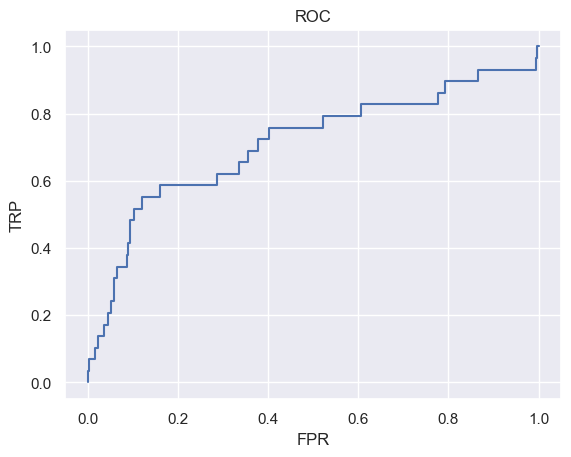

In [49]:
plt.plot(fpr,tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TRP')
plt.show()

Sur le jeu de test, le modèle a correctement prédit les étiquettes dans 78,73 % des cas. （Étant donné qu'on fait un échantillonnage aléatoire, il y aura de petites variations dans les prédictions à chaque fois qu'on exécute le modèle.）Cette valeur constitue un point de départ pour une évaluation des performances des modèles différents. Quand on regarde le graphique ROC, la courbe monte graduellement, ce qui indique que le modèle augmente sa capacité à capturer des cas positifs tout en contrôlant raisonnablement le nombre de faux positifs. Cependant, le modèle pourrait bénéficier d'un ajustement supplémentaire pour lisser la transition entre les seuils de décision.

### 3.2 Modèle non Supervisé - Clustering

Lors de l'application d'un modèle non supervisé, nous ne fournissons pas les valeurs Y au modèle.

In [50]:
#Preparation de Données
data = X_all
data.head()

,income,name_email_similarity,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,phone_home_valid_1,phone_mobile_valid_1,has_other_cards_1,foreign_request_1,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,keep_alive_session_1
0,0.494224,-1.146236,0.515785,0.000220,0.128941,-1.115589,-0.977285,-0.673043,-0.385572,-1.098696,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.193583,-0.679040,-1.144288,-0.194307,2.006075,0.041550,0.670452,2.098520,-0.387722,1.104665,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.225295,-1.069978,-1.144288,0.298199,2.018006,1.263345,0.246391,1.927787,-0.398475,-1.098696,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.838128,-0.032051,2.175858,-0.192739,-1.037307,-0.037924,-1.277513,-1.936596,-0.381271,-0.898391,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.182032,0.715486,0.515785,-0.191882,-0.969699,-0.585294,-0.621749,0.149609,-0.402776,-0.497779,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- PCA

In [51]:
# Reduction du nombre de variables explicatives
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)


- K Means

In [52]:
# Choisir le nombre de cluster le plus pertinent
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_pca)

silhouette_scores = []
K_to_try = range(2, 6)  

for k in K_to_try:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

best_k = K_to_try[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print("Best K:", best_k)
print("Best silhouette score:", best_score)


Best K: 3
Best silhouette score: 0.37971549328303805


In [53]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
# calculer nb d'échantillion
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

0    3937
2    3638
1    2425
Name: count, dtype: int64


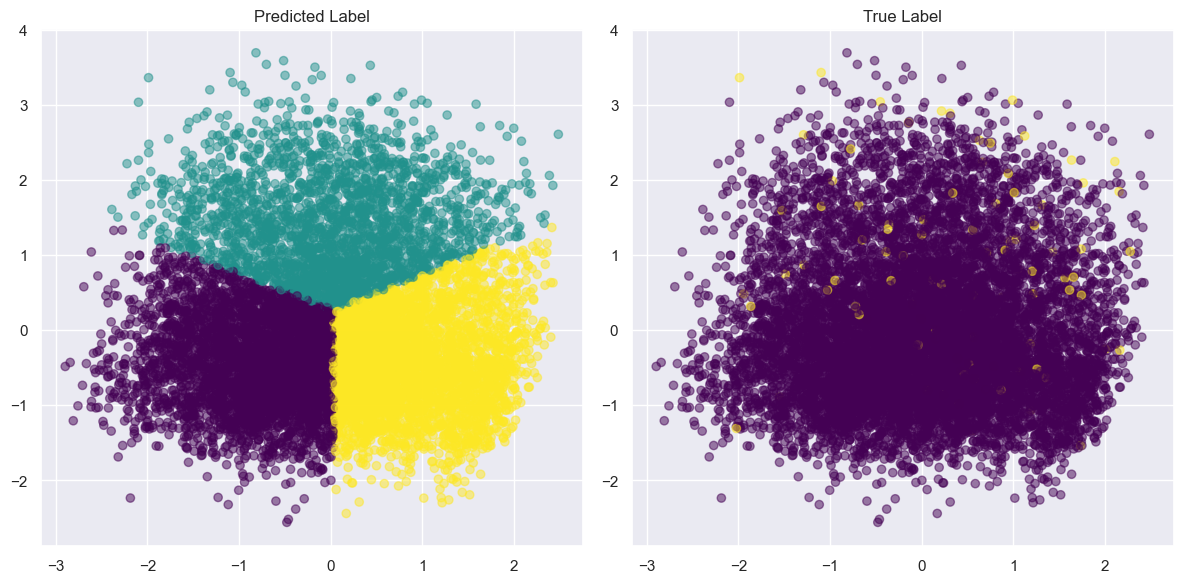

In [54]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Dessiner le nuage de points du premier sous-graphique
ax1.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
ax1.set_title('Predicted Label')

# Dessiner le nuage de points du deuxième sous-graphique
ax2.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['fraud_bool'], cmap='viridis', alpha=0.5)
ax2.set_title('True Label')


plt.tight_layout()
plt.show()

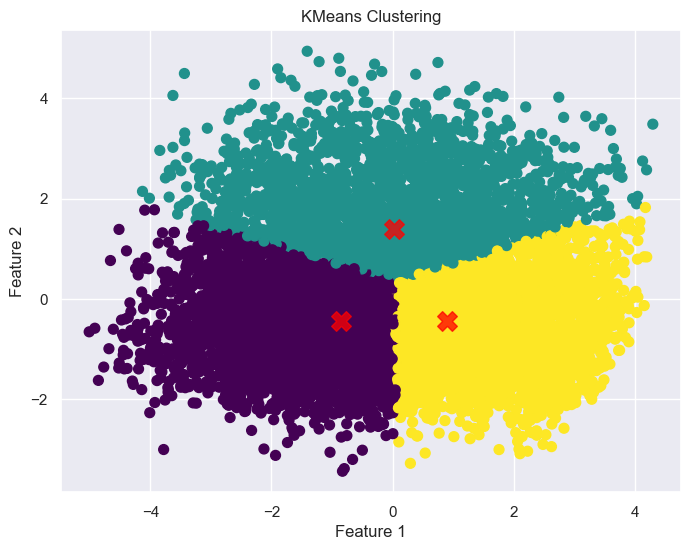

In [55]:
plt.figure(figsize=(8, 6))

# Dessiner les points de données et colorer en fonction des résultats de clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

# Dessiner les centres de clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Nous avons effectué le PCA pour réduire le nombre de variables, ce qui permet de simplifier le modèle et d'améliorer l'efficacité des calculs. Sous le modèle non-supervisé, lorsque le nombre de clusters est fixé à 3, le résultat du regroupement semble être optimal. Cependant, le score d'évaluation de la qualité du clustering est de 0,38, ce qui est loin de 1, indiquant que la séparation entre les échantillons des clusters n'est toujours pas idéale. 

Donc, dans le cadre de notre étude sur la fraude des comptes bancaires, une classification en 3 groupes ne permet pas une interprétation adéquate des résultats. Cet apprentissage non supervisé n'est pas assez adapté à ce jeu de données.

### 3.3 Modèle Supervisé

#### 3.1.1 Random Forest

- Hyperparamétrage et validation croisée


In [56]:
# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [20, 25, 30, 40, 45, 50, 60, 65, 70 ,75],
    'max_depth': [None,1,2,3],
    'min_samples_split': [2, 3, 6, 9, 10, 11, 12, 13, 14, 15]
}

# Nombre de folds pour la validation croisée
num_folds = 5

# Initialisation du modèle RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, class_weight='balanced')


In [57]:
# Création de l'objet GridSearchCV pour la recherche sur grille avec validation croisée
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = KFold(n_splits = num_folds, shuffle = True, random_state = 42), # Validation croisée avec 5 folds
    scoring = 'f1', # Métrique d'évaluation (moins c'est mieux)
    n_jobs = -1  # Utiliser tous les cœurs du processeur
)

In [58]:
# Exécuter la recherche sur grille
grid_search.fit(Xtrain, Ytrain)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)

Meilleurs hyperparamètres :  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 75}


In [59]:
# Création d'un modèle RandomForest avec les meilleurs hyperparamètres
best_rf = RandomForestClassifier(random_state = 42, **best_params, class_weight='balanced')
# Entraîner le modèle final sur la base entière
best_rf.fit(Xtrain, Ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=75,
                       random_state=42)

In [60]:
# Calculer l'accuracy des prédictions
Ypred = best_rf.predict(Xtest)
acc = accuracy_score(Ypred,Ytest)
precision = precision_score(y_true=Ytest, y_pred=Ypred)
recall = recall_score(y_true=Ytest, y_pred=Ypred)
f1 = f1_score(y_true=Ytest, y_pred=Ypred)
print(f"acc:{acc} precision:{precision} recall: {recall} f1: {f1}")

acc:0.898700433188937 precision:0.0462046204620462 recall: 0.4827586206896552 f1: 0.08433734939759036


In [61]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.95      2972
         1.0       0.05      0.48      0.08        29

    accuracy                           0.90      3001
   macro avg       0.52      0.69      0.52      3001
weighted avg       0.99      0.90      0.94      3001



In [62]:
# Enregistrement des métriques dans le dataframe de comparaisons
rf_normal_comparaison_metriques = pd.DataFrame(
    {'RandomForest_normal' : [acc, precision, recall, f1]}, index=['accuracy','precision', 'recall', 'f1'])

Le modèle atteint une exactitude de 0.901, ce qui signifie que 90.1% des prédictions sur l'ensemble des tests sont correctes.Mais la précision du modèle est extrêmement basse, à seulement 0.0446. Cela indique que parmi les instances classées positivement par le modèle, seulement 4.46% sont réellement positives.

#### Random Forest avec Under Sampling

In [63]:
# Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(Xtrain, Ytrain)

# Entraînement
clf = RandomForestClassifier(random_state = 42, **best_params, class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled)

Ypred = clf.predict(Xtest)
acc = accuracy_score(Ypred,Ytest)
precision = precision_score(y_true=Ytest, y_pred=Ypred)
recall = recall_score(y_true=Ytest, y_pred=Ypred)
f1 = f1_score(y_true=Ytest, y_pred=Ypred)

print(f"accuracy_score : {acc} \nprecision : {precision} \nrecall : {recall} \nf1_score : {f1}")

accuracy_score : 0.7557480839720093 
precision : 0.028150134048257374 
recall : 0.7241379310344828 
f1_score : 0.05419354838709677


In [64]:
# Enregistrement des métriques dans le dataframe de comparaisons
rf_undersampling_comparaison_metriques = pd.DataFrame(
    {'RandomForest_undersampling' : [acc, precision, recall, f1]}, 
    index=['accuracy','precision', 'recall', 'f1'])

#### Random Forest avec Over Sampling



In [65]:
# Oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(Xtrain, Ytrain)

# Entraînement
clf = RandomForestClassifier(random_state = 42, **best_params, class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled)
Ypred = clf.predict(Xtest)
acc = accuracy_score(Ypred,Ytest)
precision = precision_score(y_true=Ytest, y_pred=Ypred)
recall = recall_score(y_true=Ytest, y_pred=Ypred)
f1 = f1_score(y_true=Ytest, y_pred=Ypred)
print(f"accuracy_score : {acc} \nprecision : {precision} \nrecall : {recall} \nf1_score : {f1}")


accuracy_score : 0.9186937687437521 
precision : 0.0425531914893617 
recall : 0.3448275862068966 
f1_score : 0.07575757575757576


In [66]:
# Enregistrement des métriques dans le dataframe de comparaisons
rf_oversampling_comparaison_metriques = pd.DataFrame(
    {'RandomForest_oversampling' : [acc, precision, recall, f1]}, 
    index=['accuracy','precision', 'recall', 'f1'])

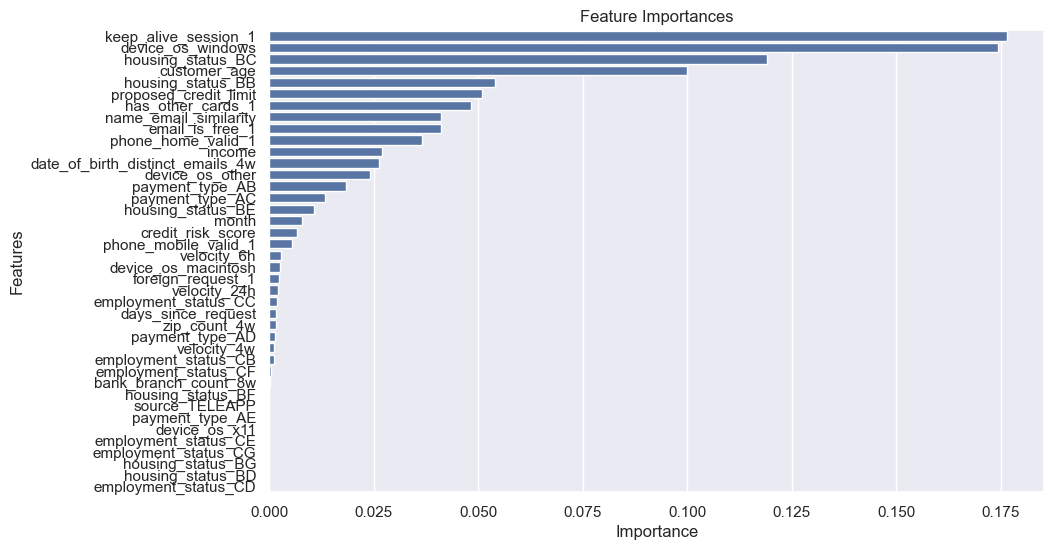

In [67]:
# Extraction de l'importance des caractéristiques
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  
feature_names = Train.columns[:-1]

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



Les données montrent que les caractéristiques telles que proposed_credit_limit et device_os_windows ont une grande influence sur les prédictions du modèle, indiquant leur pertinence dans le processus décisionnel. D'autre part, des variables comme customer_age et phone_home_valid présentent également une importance notable, bien qu'inférieure aux premières mentionnées. En revanche, certaines caractéristiques affichent une importance relativement faible, ce qui suggère qu'elles ont moins d'impact sur les performances du modèle. 

#### Sélection des features

In [68]:
# Importer la bibliothèque SMOTE pour le suréchantillonnage
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(Xtrain, Ytrain)

# Initialisation des variables pour le meilleur ensemble de caractéristiques
best_feature_train_x = X_train_resampled
best_feature_test_x = Xtest
best_f1 = 0.0
drop_col = ""
best_model = None
best_metric = {}

# on peut jeter au maximum 10 features
for i in range(10):
    tmp_best_train_x = best_feature_train_x
    tmp_best_test_x = best_feature_test_x

    # Parcourir chaque colonne (caractéristique) pour évaluer l'impact de son retrait
    for col in tmp_best_train_x.columns:
        tmp_feature_select_train_x = tmp_best_train_x.drop(columns=[col])
        tmp_feature_select_test_x = tmp_best_test_x.drop(columns=[col])
        
        # Initialiser, entrainer et prédire le modèle
        clf = RandomForestClassifier(random_state = 42, **best_params, class_weight='balanced')
        clf.fit(tmp_feature_select_train_x, y_train_resampled)
        Ypred = clf.predict(tmp_feature_select_test_x)
        
        # Calculer des indicateurs de performance
        acc = accuracy_score(Ypred,Ytest)
        precision = precision_score(y_true=Ytest, y_pred=Ypred)
        recall = recall_score(y_true=Ytest, y_pred=Ypred)
        f1 = f1_score(y_true=Ytest, y_pred=Ypred)
        if f1 > best_f1:
            best_f1 = f1
            drop_col = col
            best_train_x = tmp_feature_select_train_x
            best_test_x = tmp_feature_select_test_x
            best_metric = {
                "acc": acc,
                "precision": precision, 
                "recall": recall, 
                "f1": f1,
                "parameters": best_test_x.columns
            }

In [69]:
best_metric

{'acc': 0.923025658113962,
 'precision': 0.06086956521739131,
 'recall': 0.4827586206896552,
 'f1': 0.10810810810810811,
 'parameters': Index(['income', 'name_email_similarity', 'customer_age', 'days_since_request',
        'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
        'bank_branch_count_8w', 'credit_risk_score', 'proposed_credit_limit',
        'month', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
        'payment_type_AE', 'employment_status_CB', 'employment_status_CC',
        'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
        'employment_status_CG', 'email_is_free_1', 'housing_status_BB',
        'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
        'housing_status_BF', 'housing_status_BG', 'phone_home_valid_1',
        'phone_mobile_valid_1', 'has_other_cards_1', 'foreign_request_1',
        'source_TELEAPP', 'device_os_macintosh', 'device_os_other',
        'device_os_windows', 'device_os_x11', 'kee

In [70]:
rf_feature_engineering_comparaison_metriques = pd.DataFrame(
    {'RandomForest_engineering' : [best_metric['acc'], best_metric['precision'], best_metric['recall'], best_metric['f1']]}, 
    index=['accuracy','precision', 'recall', 'f1'])

In [71]:
print(rf_feature_engineering_comparaison_metriques)

           RandomForest_engineering
accuracy                   0.923026
precision                  0.060870
recall                     0.482759
f1                         0.108108


#### Comparaison et Affichage de résultat
On a entrainé trois modèles (Regression Logistique, Clustering K Means, et Random Forest). Et on a entrainé Random Forest dans 4 cas :

- Avec le jeu de données initial, et toutes les variables
- Avec un jeu de données équilibré (par oversampling), et toutes les variables
- Avec un jeu de données équilibré (par undersampling), et toutes les variables
- Avec un jeu de données équilibré, et en jetant les features

Les résultats du modèle non supervisé ne sont pas adaptés à cet ensemble de données, donc nous ne les comparons pas.

In [72]:
df_comparaison_metriques = pd.concat([rf_normal_comparaison_metriques, rf_oversampling_comparaison_metriques,
                                     rf_undersampling_comparaison_metriques, rf_feature_engineering_comparaison_metriques,
                                      lr_comparaison_metriques], axis=1)

In [73]:
df_comparaison_metriques

,RandomForest_normal,RandomForest_oversampling,RandomForest_undersampling,RandomForest_engineering,lr
accuracy,0.898700,0.918694,0.755748,0.923026,0.812063
precision,0.046205,0.042553,0.028150,0.060870,0.029877
recall,0.482759,0.344828,0.724138,0.482759,0.586207
f1,0.084337,0.075758,0.054194,0.108108,0.056856


#### Conclusion:

Notre base de données présentent une distribution extrêmement déséquilibrée, et les meilleurs résultats ont été obtenus après un suréchantillonnage. La valeur "precision" du modèle est légèrement améliorée après la séléction des features. Le modèle présente une haute "accuracy" mais une faible "precision" et F1 score en raison d'un déséquilibre des données, où les comptes non frauduleux (99%) sont beaucoup plus nombreux que les comptes frauduleux. Le modèle obtient une "accuracy" élevée en prédisant principalement la classe majoritaire, mais échoue à identifier correctement les comptes frauduleux, ce qui entraîne une faible "precision" et un faible "F1-score".
